In [3]:
from pathlib import Path
import pandas as pd
import numpy as np

CUR_DIR = Path('__file__').resolve().parent

dataframe = pd.read_csv(f'{CUR_DIR}/Sysarmy.csv', encoding='latin-1', delimiter=';')

In [4]:
df_caba = dataframe[dataframe['Dónde estás trabajando']=='Ciudad Autónoma de Buenos Aires']
df_caba.head()

,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Recibís algún tipo de bono,A qué está atado el bono,...,Estado,Carrera,Institución educativa,¿Salir o seguir contestando sobre las guardias?,¿Tenés guardias?,Cuánto cobrás por guardia,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,Tengo (edad),Me identifico (género)
88,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),942000.0,577000.0,Cobro parte del salario en dólares,230,3+ sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,Varón Cis
89,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),660000.0,380000.0,Mi sueldo está dolarizado (pero cobro en moned...,231,De uno a tres sueldos,Mix de las anteriores,...,Incompleto,Licenciatura en Administración,UBA - Universidad de Buenos Aires,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,45,Varón Cis
90,Argentina,Ciudad Autónoma de Buenos Aires,Part-Time,Tercerizado (trabajo a través de consultora o ...,73.0,60.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Varón Cis
91,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),490000.0,350000.0,NaN,NaN,Un sueldo,Mix de las anteriores,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,Prefiero no decir
92,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),440.0,365.0,Mi sueldo está dolarizado (pero cobro en moned...,NaN,Menos de un sueldo,Mix de las anteriores,...,En curso,Licenciatura en Sistemas de Información,UNLA - Universidad Nacional de Lanús,Responder sobre guardias,No,0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,25,Mujer Cis


In [5]:
df_caba['Dónde estás trabajando'].size

2856

In [6]:
df_data = df_caba[df_caba['Trabajo de'].str.contains('Developer', na=False)]
df_data.head()

,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Recibís algún tipo de bono,A qué está atado el bono,...,Estado,Carrera,Institución educativa,¿Salir o seguir contestando sobre las guardias?,¿Tenés guardias?,Cuánto cobrás por guardia,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,Tengo (edad),Me identifico (género)
90,Argentina,Ciudad Autónoma de Buenos Aires,Part-Time,Tercerizado (trabajo a través de consultora o ...,73.0,60.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Varón Cis
97,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),280000.0,149000.0,NaN,NaN,Menos de un sueldo,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,Varón Cis
100,Argentina,Ciudad Autónoma de Buenos Aires,Part-Time,Freelance,170000.0,170000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Varón Cis
101,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),170000.0,140000.0,NaN,NaN,Menos de un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
102,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),198000.0,164340.0,NaN,NaN,De uno a tres sueldos,Performance individual,...,En curso,Ingeniería Electrónica,UTN - Universidad Tecnológica Nacional,Terminar encuesta,NaN,NaN,NaN,NaN,23,Masculino


In [7]:
def reformat_salary_column(salario):
    """Remueve los carácteres no numéricos de la columna salario.
    Convierte los valores originalmente de tipo string a numérico y filtra el rango esperado,
    seteando los valores fuera de rango en nan.
    """
    
    pattern = '|'.join(['-', '$', ' ', 'ARS', ',', 'pesos', 'USD', 'k', 'ars', '\.', '$', 'argentinos'])

    check1 = salario.str.replace(pattern, '', regex=True)
    check2 = check1.replace(pattern, '', regex=True)
    check2 = pd.to_numeric(check2)
    salario = check2
    salario

    salario = np.where(salario<1000, salario*1000, salario)
    salario = np.where(salario<50000, np.nan, salario)
    salario = np.where(salario>=1000000, np.nan, salario)
    salario = np.where(salario==0, np.nan, salario)

    return salario

In [8]:
df_data1 = df_data[df_data['Años de experiencia']<=1]
df_data1.head()
df_data1['Años de experiencia'].size

181

In [9]:
import numpy as np
df_data1['Años'] = np.where(df_data1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")

C:\Users\Mauro\AppData\Local\Temp\ipykernel_43020\77575764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data1['Años'] = np.where(df_data1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")


In [10]:
df_fulltime = df_data1[df_data1['Dedicación'] == 'Full-Time']
df_fulltime.head()

,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Recibís algún tipo de bono,A qué está atado el bono,...,Carrera,Institución educativa,¿Salir o seguir contestando sobre las guardias?,¿Tenés guardias?,Cuánto cobrás por guardia,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,Tengo (edad),Me identifico (género),Años
101,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),170000.0,140000.0,NaN,NaN,Menos de un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis,0 años de experiencia
126,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,280000.0,230000.0,NaN,NaN,No,No recibo bono,...,Analista de Sistemas,NaN,Responder sobre guardias,No,0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,27,Varón Cis,0 años de experiencia
127,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),215000.0,180000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,Varón Cis,0 años de experiencia
132,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,225000.0,225000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,Prefiero no decir,1 año de experiencia
146,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),396000.0,320000.0,NaN,NaN,No,No recibo bono,...,Analista de Sistemas,ORT,Responder sobre guardias,No,0.0,Neto,Terminar encuesta,38,Varón Cis,1 año de experiencia


In [ ]:

# rows = [79,85,157,168,199,207]
# for row in rows:
#     df_fulltime.drop(df_fulltime.iloc[row].name, inplace=True)

In [11]:
df_fulltime['Último salario mensual  o retiro BRUTO (en tu moneda local)'].size

163

In [12]:
np.max(df_fulltime['Último salario mensual  o retiro BRUTO (en tu moneda local)'])

2350000.0

Text(0.5, 0, 'Años de experiencia')

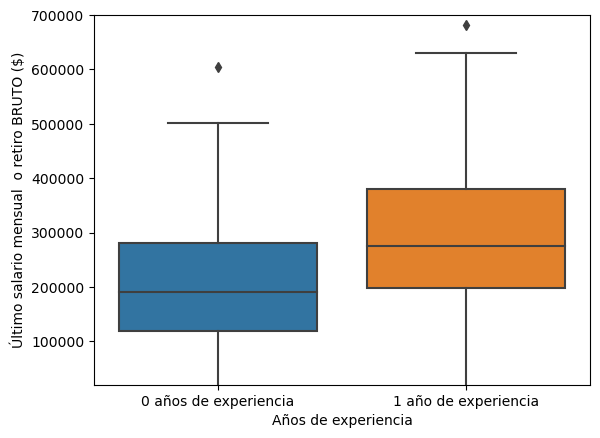

In [13]:
import seaborn as sns
ax = sns.boxplot(x='Años', y= 'Último salario mensual  o retiro BRUTO (en tu moneda local)', data=df_fulltime)
ax.set(ylim=(20000, 700000))
ax.set_ylabel('Último salario mensual  o retiro BRUTO ($)')
ax.set_xlabel('Años de experiencia')

Salario medio:273174, Minimo salario: 166.0, Maximo salario: 2350000.0


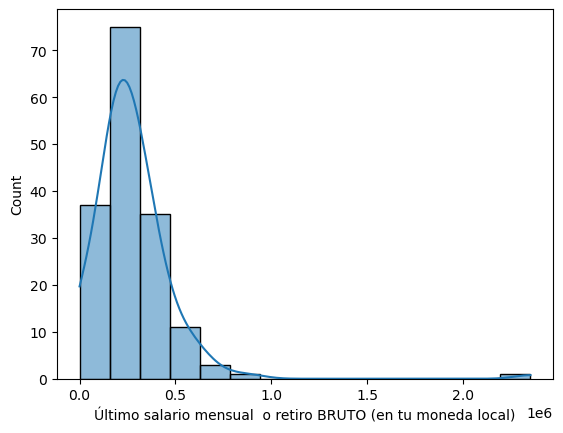

In [14]:
salario = df_fulltime['Último salario mensual  o retiro BRUTO (en tu moneda local)']
sns.histplot(data=df_fulltime, x="Último salario mensual  o retiro BRUTO (en tu moneda local)", bins=15, kde=True)


print(f'Salario medio:{int(np.nanmean(salario))}, Minimo salario: {np.nanmin(salario)}, Maximo salario: {np.nanmax(salario)}')

In [15]:
conditions = [
    (df_data['Años de experiencia'] <= 2),
    (df_data['Años de experiencia'] > 2) & (df_data['Años de experiencia'] <= 5),
    (df_data['Años de experiencia'] > 5) & (df_data['Años de experiencia'] <= 10),
    (df_data['Años de experiencia'] > 10)
    ]

values = ['2 o menos', '3 á 5', '6 á 10', 'Más de 10']

df_data['Años experiencia'] = np.select(conditions, values)

df_data.head()

C:\Users\Mauro\AppData\Local\Temp\ipykernel_43020\1823813411.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Años experiencia'] = np.select(conditions, values)


,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Recibís algún tipo de bono,A qué está atado el bono,...,Carrera,Institución educativa,¿Salir o seguir contestando sobre las guardias?,¿Tenés guardias?,Cuánto cobrás por guardia,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,Tengo (edad),Me identifico (género),Años experiencia
90,Argentina,Ciudad Autónoma de Buenos Aires,Part-Time,Tercerizado (trabajo a través de consultora o ...,73.0,60.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Varón Cis,2 o menos
97,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),280000.0,149000.0,NaN,NaN,Menos de un sueldo,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,Varón Cis,2 o menos
100,Argentina,Ciudad Autónoma de Buenos Aires,Part-Time,Freelance,170000.0,170000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Varón Cis,2 o menos
101,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),170000.0,140000.0,NaN,NaN,Menos de un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis,2 o menos
102,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),198000.0,164340.0,NaN,NaN,De uno a tres sueldos,Performance individual,...,Ingeniería Electrónica,UTN - Universidad Tecnológica Nacional,Terminar encuesta,NaN,NaN,NaN,NaN,23,Masculino,2 o menos


In [ ]:
# rows = [70,160,246,361,406,457,589,591,679,732,777,792,803,852,853,854,855,883,979,994,1017,1087]
# for row in rows:
#     df_data.drop(df_data.iloc[row].name, inplace=True)

In [18]:
sal = df_data['Último salario mensual  o retiro BRUTO (en tu moneda local)']

In [17]:
df_data['Último salario mensual  o retiro BRUTO (en tu moneda local)'] = sal

NameError: name 'sal' is not defined

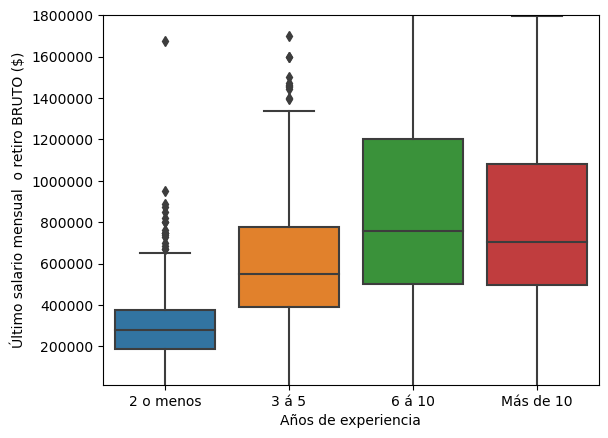

In [27]:
import matplotlib.pyplot as plt
ax = sns.boxplot(x='Años experiencia', y= 'Último salario mensual  o retiro BRUTO (en tu moneda local)', order = ['2 o menos', '3 á 5', '6 á 10', 'Más de 10'], data=df_data)
ax.set(ylim=(15000, 1800000))
ax.set_ylabel('Último salario mensual  o retiro BRUTO ($)')
ax.set_xlabel('Años de experiencia')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

In [28]:
engineer = dataframe[dataframe['Trabajo de'].str.contains('Data Engineer', na=True)]
engineer1 = engineer[engineer['Años de experiencia']<=1]
engineer1.head()

,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Recibís algún tipo de bono,A qué está atado el bono,...,Estado,Carrera,Institución educativa,¿Salir o seguir contestando sobre las guardias?,¿Tenés guardias?,Cuánto cobrás por guardia,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,Tengo (edad),Me identifico (género)
5,Argentina,Chaco,Full-Time,Staff (planta permanente),276000.0,229000.0,NaN,NaN,No,No recibo bono,...,Completo,Analista Universitario de Sistemas,UTN - Universidad Tecnológica Nacional,Responder sobre guardias,"Sí, pasiva",0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,28,Varón Cis
19,Argentina,Chaco,Full-Time,Staff (planta permanente),230000.0,1900000.0,NaN,NaN,No,No recibo bono,...,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,Terminar encuesta,NaN,NaN,NaN,NaN,21,Prefiero no decir
40,Argentina,Chaco,Full-Time,Staff (planta permanente),490476.0,408096.0,NaN,NaN,De uno a tres sueldos,Mix de las anteriores,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,Varón Cis
139,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),209900.0,180700.0,NaN,NaN,No,No recibo bono,...,Incompleto,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,Responder sobre guardias,No,0.0,Neto,Terminar encuesta,22,Mujer Cis
241,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),192000.0,160000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,Varón Cis


In [43]:
salario = engineer1['Último salario mensual  o retiro BRUTO (en tu moneda local)']


In [ ]:
# engineer1['Último salario mensual  o retiro BRUTO (en tu moneda local)'] = salario
# engineer1['Último salario mensual  o retiro BRUTO (en tu moneda local)']

Salario medio:363605, Minimo salario: 130000.0, Maximo salario: 1000000.0


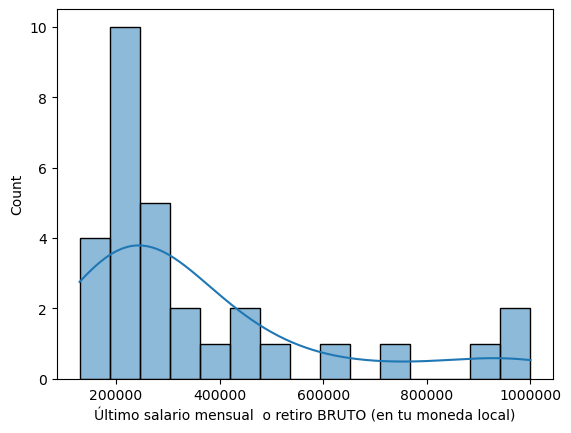

In [44]:
sns.histplot(data=engineer1, x="Último salario mensual  o retiro BRUTO (en tu moneda local)", bins=15, kde=True)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

print(f'Salario medio:{int(np.nanmean(salario))}, Minimo salario: {np.nanmin(salario)}, Maximo salario: {np.nanmax(salario)}')

In [33]:
engineer1['Años'] = np.where(engineer1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")

C:\Users\Mauro\AppData\Local\Temp\ipykernel_43020\3354579835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engineer1['Años'] = np.where(engineer1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")


Text(0.5, 0, 'Años de experiencia')

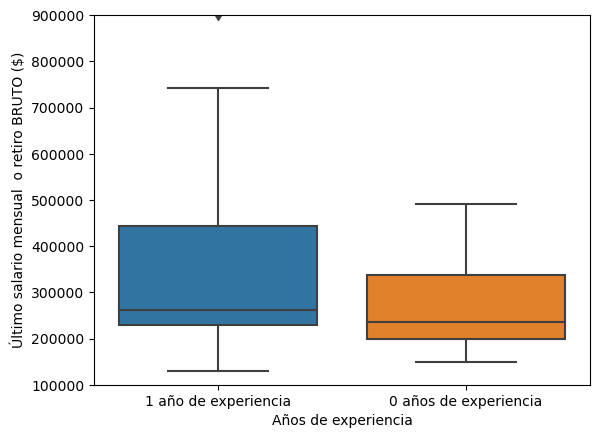

In [34]:
ax = sns.boxplot(x='Años', y= 'Último salario mensual  o retiro BRUTO (en tu moneda local)', data=engineer1)
ax.set(ylim=(100000, 900000))
ax.set_ylabel('Último salario mensual  o retiro BRUTO ($)')
ax.set_xlabel('Años de experiencia')

In [35]:
scientist = dataframe[dataframe['Trabajo de'].str.contains('Data Scientist', na=True)]
scientist1 = scientist[scientist['Años de experiencia']<=1]
scientist.head()

,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Recibís algún tipo de bono,A qué está atado el bono,...,Estado,Carrera,Institución educativa,¿Salir o seguir contestando sobre las guardias?,¿Tenés guardias?,Cuánto cobrás por guardia,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,Tengo (edad),Me identifico (género)
184,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),370000.0,310000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,Varón Cis
200,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),1000000.0,750000.0,Cobro parte del salario en dólares,232,De uno a tres sueldos,Mix de las anteriores,...,Completo,Ingeniería Industrial,UCA - Universidad Católica Argentina,Terminar encuesta,NaN,NaN,NaN,NaN,30,Varón Cis
271,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,240000.0,NaN,NaN,NaN,No,No recibo bono,...,En curso,Licenciatura en Ciencia de Datos,UBA - Universidad de Buenos Aires,Responder sobre guardias,No,0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,23,Mujer Cis
380,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),280000.0,226000.0,NaN,NaN,Menos de un sueldo,Mix de las anteriores,...,En curso,Licenciatura en Ciencia de Datos,UBA - Universidad de Buenos Aires,Terminar encuesta,NaN,NaN,NaN,NaN,25,Mujer Cis
433,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),400000.0,325000.0,NaN,NaN,No,No recibo bono,...,En curso,Ingeniería en Informática,UBA - Universidad de Buenos Aires,Responder sobre guardias,No,0.0,Neto,Terminar encuesta,26,Varón Cis


In [45]:
salario = scientist1['Último salario mensual  o retiro BRUTO (en tu moneda local)']
# scientist1['Último salario mensual  o retiro BRUTO (en tu moneda local)'] = salario
# scientist1['Último salario mensual  o retiro BRUTO (en tu moneda local)']

Salario medio:320044, Minimo salario: 50.0, Maximo salario: 620000.0


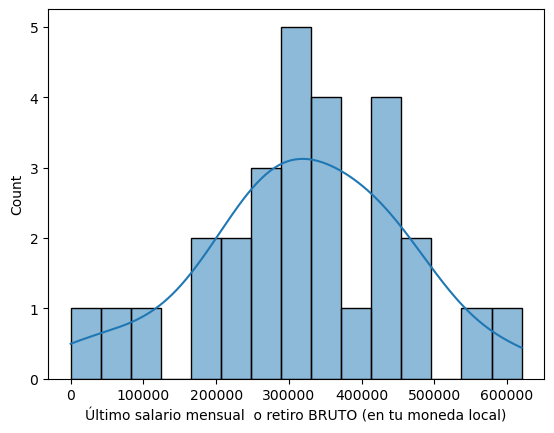

In [46]:
sns.histplot(data=scientist1, x="Último salario mensual  o retiro BRUTO (en tu moneda local)", bins=15, kde=True)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

print(f'Salario medio:{int(np.nanmean(salario))}, Minimo salario: {np.nanmin(salario)}, Maximo salario: {np.nanmax(salario)}')

C:\Users\Mauro\AppData\Local\Temp\ipykernel_43020\3634510457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scientist1['Años'] = np.where(scientist1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")


Text(0.5, 0, 'Años de experiencia')

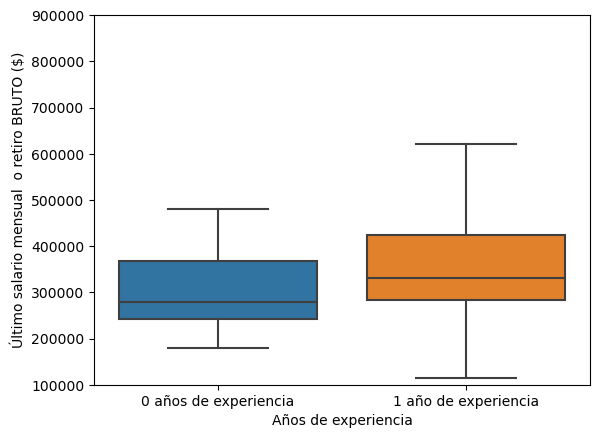

In [37]:
scientist1['Años'] = np.where(scientist1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")
ax = sns.boxplot(x='Años', y= 'Último salario mensual  o retiro BRUTO (en tu moneda local)', data=scientist1, order=["0 años de experiencia", "1 año de experiencia"])
ax.set(ylim=(100000, 900000))
ax.set_ylabel('Último salario mensual  o retiro BRUTO ($)')
ax.set_xlabel('Años de experiencia')

In [38]:
df_analyst = dataframe[dataframe['Trabajo de'].str.contains('Data Analyst', na=False)]

In [39]:
analyst1 = df_analyst[df_analyst['Años de experiencia']<=1]
analyst1.head()

,Estoy trabajando en,Dónde estás trabajando,Dedicación,Tipo de contrato,Último salario mensual o retiro BRUTO (en tu moneda local),Último salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?,Recibís algún tipo de bono,A qué está atado el bono,...,Estado,Carrera,Institución educativa,¿Salir o seguir contestando sobre las guardias?,¿Tenés guardias?,Cuánto cobrás por guardia,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,Tengo (edad),Me identifico (género)
41,Argentina,Chaco,Full-Time,Staff (planta permanente),288000.0,239040.0,NaN,NaN,No,No recibo bono,...,En curso,Licenciatura en Administración,UNNNE - Universidad Nacional del Nordeste,Terminar encuesta,NaN,NaN,NaN,NaN,28,Prefiero no decir
291,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),335000.0,275000.0,Cobro parte del salario en dólares,NaN,Un sueldo,Mix de las anteriores,...,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,Terminar encuesta,NaN,NaN,NaN,NaN,22,Varón Cis
579,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),420000.0,35000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis
773,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Freelance,450000.0,475000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Mujer Cis
995,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),190000.0,157000.0,NaN,NaN,No,No recibo bono,...,En curso,Licenciatura en gestion de tecnologia de la in...,UADE - Universidad Argentina De la Empresa,Terminar encuesta,NaN,NaN,NaN,NaN,29,Varón Cis


In [41]:
salario = analyst1['Último salario mensual  o retiro BRUTO (en tu moneda local)']

Salario medio:243356, Minimo salario: 190.0, Maximo salario: 850000.0


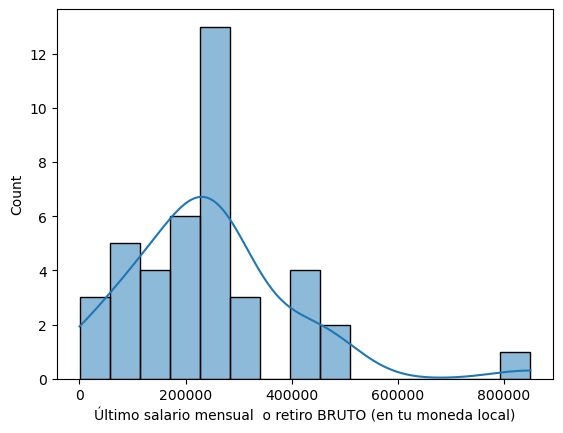

In [42]:
sns.histplot(data=analyst1, x="Último salario mensual  o retiro BRUTO (en tu moneda local)", bins=15, kde=True)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

print(f'Salario medio:{int(np.nanmean(salario))}, Minimo salario: {np.nanmin(salario)}, Maximo salario: {np.nanmax(salario)}')

In [47]:
analyst1['Años'] = np.where(analyst1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")

C:\Users\Mauro\AppData\Local\Temp\ipykernel_43020\527907154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyst1['Años'] = np.where(analyst1['Años de experiencia'] == 1, "1 año de experiencia", "0 años de experiencia")


Text(0.5, 0, 'Años de experiencia')

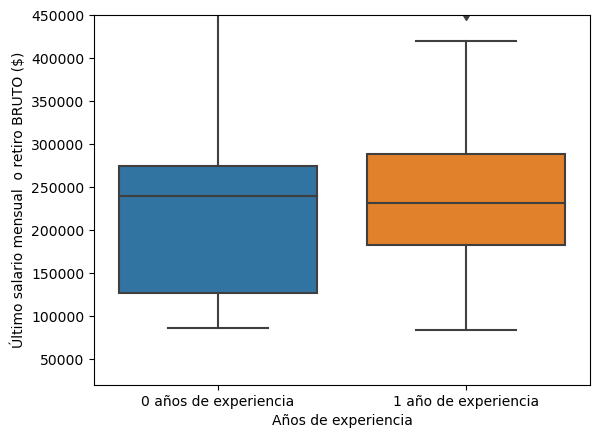

In [48]:
ax = sns.boxplot(x='Años', y= 'Último salario mensual  o retiro BRUTO (en tu moneda local)', data=analyst1, order=["0 años de experiencia", "1 año de experiencia"])
ax.set(ylim=(20000, 450000))
ax.set_ylabel('Último salario mensual  o retiro BRUTO ($)')
ax.set_xlabel('Años de experiencia')